# Cluster Sample Properties 

This notebook is a part of the analysis work for the first XMM Cluster Survey (XCS) cluster mass paper (Turner et al.), where we present our method and tests to demonstrate the veracity of our results. This notebook details the samples we use in the first paper, and generates distribution plots of their basic properties.

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import LambdaCDM
from astropy.units import Quantity
from tqdm import tqdm

from common import xcs3p_colour, locuss_colour, xxlgc100_colour
from xga.sourcetools import rad_to_ang

## Setting up Useful  Functions

Here we set up any functions that are used in the course of this notebook.

In [2]:
def duplicate_finder(obj, catalogue, match_sep, match_dsep, use_dist=False):
    search = True
    nth = 2
    
    match_cat_pos = []
    seps = []
    dseps = []
    
    while search:
        cat_pos, sep, dsep = c.match_to_catalog_3d(catalogue, nthneighbor=nth)
        
        if not use_dist and sep < match_sep:
            match_cat_pos.append(cat_pos.item())
            seps.append(sep.item())
            dseps.append(dsep.item())
            nth += 1
        elif use_dist and sep < match_sep and dsep < match_dsep:
            match_cat_pos.append(cat_pos.item())
            seps.append(sep.item())
            dseps.append(dsep.item())
            nth += 1
        else:
            search = False
    
    return match_cat_pos, seps, dseps

## Loading in Sample Files

This section loads in the various samples that are used during this paper, as well as providing simple descriptions of the analyses that produced them and linking to the paper they originate from.

### SDSSRM-XCS Volume Limited Cluster Sample

A sample of galaxy clusters created by the XMM Cluster Survey (XCS) and presented in Giles et al. (in prep). The sample is made up of clusters detected in the Sloan Digital Sky Survey (SDSS) by the red-sequence Matched-filter Probabilistic Percolation (redMaPPer), then cross-matched to the XCS master source list (MSL). A visual inspection process was applied to clean the sample. Then a volume limited (0.1<$z$<0.35) subset with well constrained intra-cluster medium temperatures measured by the XCS3P pipeline ($\Delta T_{\rm{X, \%}}$ < 25%) was created.

This dataset contains:
* **150 galaxy clusters**
* Optical detection coordinates from redMaPPer
* XCS XAPA (our source finder) centroid coordinates for the X-ray detection
* redMaPPer redshift measurement
* $R_{500}$ measured iteratively by the XCS3P pipeline, with uncertainties [kpc]
* $T_\rm{X}$ measured within $R_{500}$ [keV]
* Soft-band (0.5-2.0 keV) and bolometric (0.01-100.0 keV) $L_{\rm{X}}$ measured within $R_{500}$ [$10^{44}$ erg s$^{-1}$]
* Optical richness measured by redMaPPer

In [3]:
xcs3p = pd.read_csv("../sample_files/xcs3p_sdssrm_vol_lim_temperr_25%_clusters.csv")
print("There are", len(xcs3p), "clusters")
xcs3p.head(10)

There are 150 clusters


,name,MEM_MATCH_ID,xapa_ra,xapa_dec,z,r500,r500-,r500+,Tx,Tx-,Tx+,Lx52,Lx52-,Lx52+,Lx,Lx-,Lx+,richness,richness_err,XCS_NAME
0,SDSSXCS-124,124,0.800578,-6.091818,0.247483,1181.028159,21.202221,23.202641,6.87647,0.122843,0.156683,4.999481,0.020335,0.020837,20.090185,0.209979,0.190768,109.550186,4.489680,XMMXCS J000312.1-060530.5
1,SDSSXCS-2789,2789,0.955540,2.068019,0.105285,1007.860978,17.194150,17.201505,4.61426,0.083565,0.083663,0.999846,0.004466,0.004531,3.259035,0.032552,0.036913,38.904396,2.830206,XMMXCS J000349.3+020404.8
2,SDSSXCS-290,290,2.722639,29.161021,0.348495,913.052256,30.878754,31.209675,4.81756,0.265472,0.268848,2.844317,0.053578,0.053468,9.468884,0.344389,0.298495,105.095730,5.994321,XMMXCS J001053.4+290939.6
3,SDSSXCS-1018,1018,4.406325,-0.876192,0.214403,902.259231,22.444665,23.366414,4.18272,0.152068,0.161102,0.755317,0.007840,0.008377,2.349908,0.051182,0.054207,56.996796,3.219202,XMMXCS J001737.5-005234.2
4,SDSSXCS-134,134,4.908390,3.609818,0.277304,1123.320736,19.219312,19.225964,6.52537,0.104618,0.104746,4.531085,0.020809,0.022159,17.676719,0.183137,0.173802,108.604380,4.792484,XMMXCS J001938.0+033635.3
5,SDSSXCS-119,119,8.464699,-7.862901,0.304174,944.275364,46.422352,46.746651,4.89118,0.410713,0.413813,1.917514,0.045319,0.047116,6.432022,0.361096,0.328349,128.191760,5.697052,XMMXCS J003351.5-075146.4
6,SDSSXCS-209,209,9.276818,9.157188,0.268822,1295.732181,27.424415,27.434079,8.33772,0.186777,0.186959,4.142106,0.023543,0.024526,18.547229,0.262881,0.269694,101.709130,4.746494,XMMXCS J003706.4+090925.8
7,SDSSXCS-15,15,11.628250,20.467691,0.103966,850.081228,63.425993,73.273587,3.74253,0.457251,0.531215,0.077969,0.002950,0.002807,0.230518,0.021301,0.018076,123.355934,3.702013,XMMXCS J004630.7+202803.6
8,SDSSXCS-71,71,13.996563,26.330304,0.196102,1095.926850,19.708141,19.728080,5.77500,0.117799,0.118088,2.448763,0.012976,0.012896,8.945989,0.103987,0.109071,112.921530,4.166370,XMMXCS J005559.1+261949.0
9,SDSSXCS-5020,5020,16.061785,25.086602,0.165803,870.993979,44.263736,44.687656,3.97491,0.330676,0.334131,0.446232,0.010580,0.011778,1.355623,0.066309,0.072467,30.468397,3.096611,XMMXCS J010414.8+250511.7


### Sample notes

* SDSSXCS-11154 has had its XAPA coordinates altered from (349.60619, 18.713054) degrees to (349.59, 18.734) because the initial XAPA position was biased by a huge local point source that is contaminating the cluster emission.

### XXL-100-GC Cluster Sample

A sub-sample of the 100 brightest galaxy clusters detected by the XXL survey, selected by setting a lower limit of 3×$10^{−14}$ erg s$^{−1}$cm$^{−2}$ on the flux measured within a 1’ aperture. The XXL survey is made up of two contiguous regions (XXL North and XXL South) observed by XMM-Newton, totalling ~50 deg$^{2}$. This catalogue is available on VizieR, and contains (among other things):
* **107 galaxy clusters**
* Detection coordinates
* Redshifts (from various photometric and spectroscopic sources), 
* ICM temperatures measured within 300 kpc [keV]
* Luminosity measurements; soft-band (0.5-2.0 keV) luminosity within 300 kpc and bolometric luminosity within $R_{500}$ [$10^{43}$ erg s$^{-1}$]
* Values for R$_{500}$ [Mpc], as well as uncertainties - **NOTE that these were taken from Eckert et al. 2016, rather than VizieR**
* Estimated gas masses within $R_{500}$ [$10^{13}$ M$_{\odot}$]

In [4]:
xxlgc100 = pd.read_csv("../sample_files/xxl_gc100.csv")
print("There are", len(xxlgc100), "clusters")
xxlgc100.head(10)

There are 107 clusters


,name,XLSSC,ra,dec,z,r500MT,r500MT_err,T300kpc,T300kpc-,T300kpc+,mg500,mg500_err,L52_300kpc,L52_300kpc_err,Lbol_500,Lbol_500_err,C60,F60,F60_err,Flag
0,XLSSC-94,94,30.648,-6.732,0.886,0.742,0.129,4.68,0.88,1.25,1.61,0.59,19.85,1.71,62.01,5.35,199,4.82,0.44,0
1,XLSSC-96,96,30.973,-5.027,0.520,1.000,0.180,5.47,1.13,2.01,2.02,0.74,3.77,0.40,16.05,1.71,161,3.64,0.39,0
2,XLSSC-102,102,31.322,-4.652,0.969,0.574,0.096,3.21,0.54,0.83,2.23,0.71,13.31,1.41,33.56,3.56,199,4.20,0.36,0
3,XLSSC-106,106,31.351,-5.732,0.300,0.856,0.125,3.32,0.28,0.38,2.15,0.50,3.16,0.15,10.48,0.49,681,9.13,0.39,0
4,XLSSC-107,107,31.354,-7.594,0.436,0.711,0.111,2.72,0.35,0.44,1.14,0.35,3.82,0.32,10.33,0.88,263,5.58,0.41,0
5,XLSSC-100,100,31.549,-6.193,0.915,0.694,0.143,4.27,1.17,1.74,1.73,0.50,11.12,2.50,32.42,7.28,124,3.55,0.52,0
6,XLSSC-93,93,31.699,-6.948,0.429,0.810,0.123,3.41,0.38,0.55,2.48,0.60,4.75,0.31,14.91,0.96,418,7.23,0.41,0
7,XLSSC-108,108,31.832,-4.827,0.254,0.705,0.101,2.24,0.15,0.26,0.52,0.10,1.49,0.10,3.86,0.26,451,6.16,0.34,0
8,XLSSC-95,95,31.962,-5.206,0.138,0.450,0.064,0.90,0.05,0.07,0.03,0.01,0.15,0.03,0.24,0.04,141,3.09,0.32,0
9,XLSSC-92,92,32.071,-7.276,0.432,0.771,0.138,3.13,0.64,0.76,1.39,0.39,2.11,0.24,6.24,0.70,166,3.14,0.33,0


### LoCuSS High-$L_{\rm{X}}$ Cluster Sample

A sample of 50 galaxy clusters selected from the ROSAT all sky survey (RASS) catalogues, for which hydrostatic masses have been measured using a mix of XMM-Newton and Chandra observations. Numerous cuts were applied to arrive at the full LoCuSS sample of 165 samples, which were then cut down further to produce the high-luminosity sample we shall use. 

Most of the data in this table has been taken from [Martino et al. (2014)](https://doi.org/10.1093/mnras/stu1267
), though the temperature, luminosity, and WL R$_{500}$ were given by Graham Smith in private communication.

Present in this dataset are:
* **50 galaxy clusters**
* Coordinates
* Redshifts
* R$_{2500}$, R$_{1000}$, and R$_{500}$ values estimated through an $R-Y_{\rm{X}}$ relation [kpc]
* Hydrostatic masses (XMM and Chandra) for R$_{2500}$, R$_{1000}$, and R$_{500}$ [$10^{14}\rm{M}_{\odot}$]
* Gas masses (XMM and Chandra) for R$_{2500}$, R$_{1000}$, and R$_{500}$ [$10^{14}\rm{M}_{\odot}$]
* XMM temperature measurements within 0.15-1 $R_{500}$ [keV]
* XMM bolometric luminosity measurements within 0.15-1 $R_{500}$ [${10^{44}\rm{erg s}^{-1}}$]

In [5]:
locuss = pd.read_csv("../sample_files/locuss_highlx_clusters.csv", dtype={'chandra_id': str, 'xmm_obsid': str})
print("There are", len(locuss), "clusters")
locuss.head(10)

There are 50 clusters


,name,ra,dec,z,chandra_id,xmm_obsid,r2500,r1000,r500,c_m2500,...,x_mg1000,x_mg1000_err,x_mg500,x_mg500_err,x_Tx500ce,x_Tx500ce-,x_Tx500ce+,x_Lxbol,x_Lxbol_err,r500wl
0,Abell2697,0.799917,-6.09322,0.232,NaN,0652010401,510.0,840.0,1200.0,NaN,...,5.670000e+13,2.200000e+12,8.800000e+13,3.700000e+12,6.992,0.375,0.477,18.658,0.463,1181.0
1,Abell0068,9.275460,9.15844,0.255,3250,0084230201,580.0,970.0,1400.0,3.850000e+14,...,6.330000e+13,4.000000e+11,9.280000e+13,8.000000e+11,7.658,0.622,0.769,15.863,0.618,1231.0
2,Abell2813,10.853000,-20.62360,0.292,9409,0042340201,500.0,860.0,1240.0,2.540000e+14,...,6.250000e+13,6.000000e+11,9.990000e+13,7.000000e+11,6.322,0.698,0.965,20.197,3.634,1320.0
3,Abell0115S,14.001200,26.34240,0.197,3233,0203220101,350.0,610.0,890.0,8.100000e+13,...,2.640000e+13,1.000000e+11,5.190000e+13,3.000000e+11,5.848,0.300,0.386,9.529,0.213,1115.0
4,Abell141,16.399200,-24.68110,0.230,9410,NaN,340.0,670.0,1020.0,8.100000e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ZwCl0104.4+0048,16.706400,1.05611,0.254,10465,NaN,340.0,540.0,760.0,7.100000e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Abell0209,22.972200,-13.61220,0.206,"3579,522",0084230301,480.0,800.0,1150.0,1.960000e+14,...,5.310000e+13,2.000000e+11,9.090000e+13,3.000000e+11,7.038,0.483,0.605,19.307,0.596,1513.0
7,Abell0267,28.176300,1.01136,0.230,3580,0084230401,510.0,820.0,1170.0,2.480000e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Abell0291,30.429100,-2.19619,0.196,NaN,0605000301,380.0,650.0,940.0,NaN,...,2.450000e+13,1.800000e+12,3.910000e+13,3.100000e+12,4.033,0.293,0.324,9.492,0.255,1092.0
9,Abell0383,42.014100,-3.52933,0.188,"2320,524",0084230501,480.0,750.0,1010.0,2.010000e+14,...,3.000000e+13,1.000000e+11,4.330000e+13,2.000000e+11,4.574,0.338,0.420,12.795,0.370,1144.0


## Visualising Sample Properties

Here we make plots showing the distributions of temperature, luminosity, and redshift from literature.

### Temperature Distributions

Plot the histogrammed distributions of intra-cluster medium (ICM) temperature taken from literature, largely to demonstrate the different temperature (and thus mass) range covered by the galaxy cluster samples. We also setup the temperature bins as a variable to make it easier to change later:

In [6]:
temp_bins = np.arange(0, 16, 1)

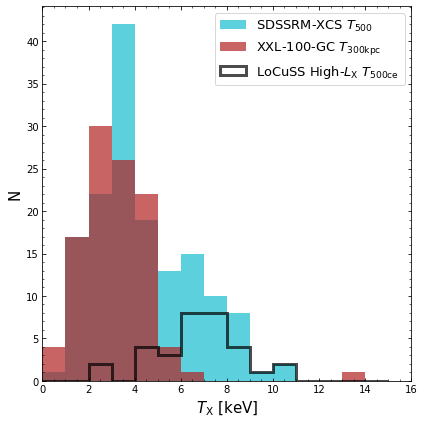

In [7]:
plt.figure(figsize=(6, 6))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(xcs3p['Tx'].values, bins=temp_bins, color=xcs3p_colour, alpha=0.7, histtype='stepfilled', 
         label=r"SDSSRM-XCS $T_{500}$", linewidth=3)
plt.hist(xxlgc100['T300kpc'].values, bins=temp_bins, color=xxlgc100_colour, alpha=0.7, histtype='stepfilled', 
         label=r"XXL-100-GC $T_{300\rm{kpc}}$", linewidth=3)
plt.hist(locuss['x_Tx500ce'].values, bins=temp_bins, color=locuss_colour, alpha=0.7, histtype='step', 
         label=r"LoCuSS High-$L_{\rm{X}}$ $T_{500\rm{ce}}$", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"$T_{\rm{X}}$ [keV]", fontsize=15)

plt.xlim(0, 16)
plt.legend(fontsize=13)
plt.tight_layout()

plt.savefig("../outputs/non_paper_figures/samps_tdist.pdf")
plt.show()

### Redshift Distributions

Plot the histogrammed distributions of redshift taken from literature, to demonstrate the redshift range covered by these samples. The XXL-100-GC sample has the highest redshift cluster at $z=1.05$. The SDSSRM-XCS sample is volume limited with maximum $z=0.35$, and LoCuSS is limited to $z=0.3$. First we setup the redshift bins:

In [8]:
z_bins = np.arange(0, 1.1, 0.1)

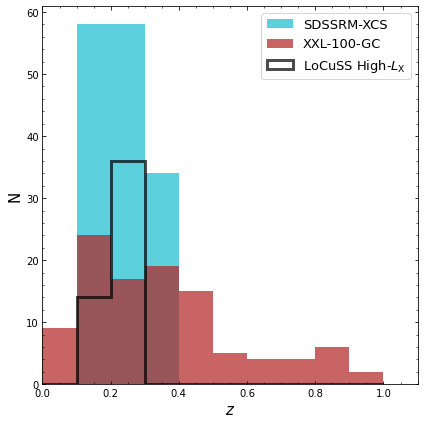

In [9]:
plt.figure(figsize=(6, 6))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(xcs3p['z'].values, bins=z_bins, color=xcs3p_colour, alpha=0.7, histtype='stepfilled', 
         label=r"SDSSRM-XCS", linewidth=3)
plt.hist(xxlgc100['z'].values, bins=z_bins, color=xxlgc100_colour, alpha=0.7, histtype='stepfilled', 
         label=r"XXL-100-GC", linewidth=3)
plt.hist(locuss['z'].values, bins=z_bins, color=locuss_colour, alpha=0.7, histtype='step', 
         label=r"LoCuSS High-$L_{\rm{X}}$", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"$z$", fontsize=15)

plt.xlim(0, 1.1)
plt.legend(fontsize=13)
plt.tight_layout()

plt.savefig("../outputs/non_paper_figures/samps_zdist.pdf")
plt.show()

### Luminosity Distributions

Finally the distributions of bolometric luminosity of the clusters in these samples. Not all the measurements are completely equivelant, but for a basic comparison that is acceptable. The SDSSRM-XCS and Planck selected samples are both measured within $R_{500}$, the XXL-100-GC luminosities are measured within 300 kpc, and the LoCuSS luminosities are measured within (0.15-1)$R_{500}$. As the LoCuSS sample is X-ray selected specifically for high luminosity systems we can see it only exists at the top end of the luminosity distribution.

$\color{red}{\text{I'm still not entirely sure about the multipliers for some of these samples.}}$

In [10]:
l_bins = np.logspace(42, 46, 23, endpoint=False)

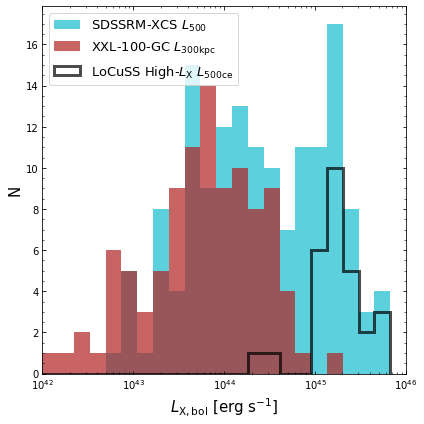

In [11]:
plt.figure(figsize=(6, 6))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(xcs3p['Lx'].values*1e+44, bins=l_bins, color=xcs3p_colour, alpha=0.7, histtype='stepfilled', 
         label=r"SDSSRM-XCS $L_{500}$", linewidth=3)
plt.hist(xxlgc100['Lbol_500'].values*1e+43, bins=l_bins, color=xxlgc100_colour, alpha=0.7, histtype='stepfilled', 
         label=r"XXL-100-GC $L_{300 \rm{kpc}}$", linewidth=3)
plt.hist(locuss['x_Lxbol'].values*1e+44, bins=l_bins, color=locuss_colour, alpha=0.7, histtype='step', 
         label=r"LoCuSS High-$L_{\rm{X}}$ $L_{500\rm{ce}}$", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"$L_{\rm{X, bol}}$ [erg s$^{-1}$]", fontsize=15)

plt.xlim(1e+42, 1e+46)
plt.xscale('log')
plt.legend(fontsize=13, loc=2)
plt.tight_layout()

plt.savefig("../outputs/non_paper_figures/samps_ldist.pdf")
plt.show()

### Combined Plot

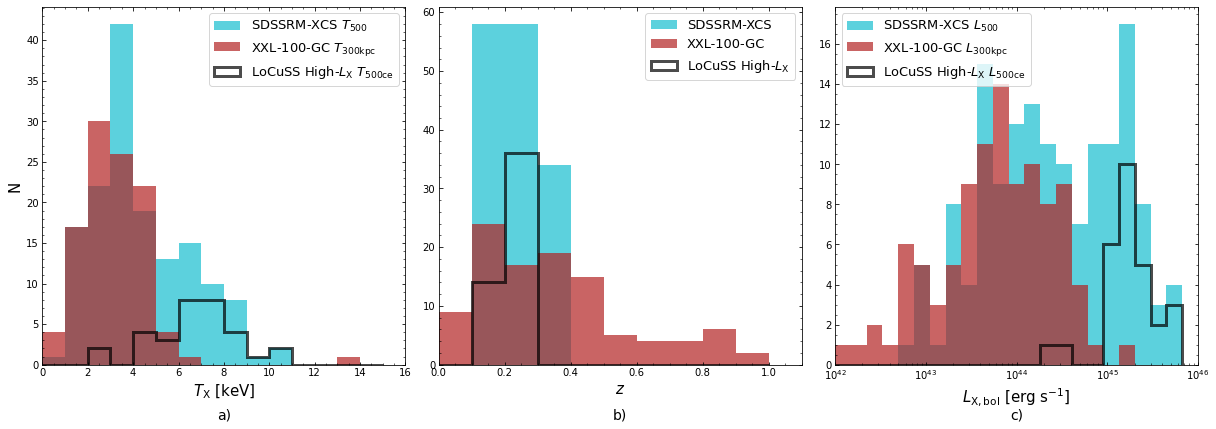

In [12]:
# Set up the matplotlib figure with 3 columns, meaning three subplots
fig, ax_arr = plt.subplots(ncols=3, figsize=(17, 6))

# Setting the y-position and font size of the a, b, and c labels that are added below the subplots
sublabel_ypos = -0.14
sublabel_fsize = 14

# Iterating through the array of axes objects, setting up the ticks
for ax_ind, ax in enumerate(ax_arr):
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True, direction='in')
    # Add the a, b, c, etc labels below the axes
    ax.text(0.5, sublabel_ypos, s='{})'.format(chr(97+ax_ind)), horizontalalignment='center', 
            verticalalignment='center', transform=ax.transAxes, fontsize=sublabel_fsize)

# Reading out the first axis in the array of axes
plt.sca(ax_arr[0])
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(xcs3p['Tx'].values, bins=temp_bins, color=xcs3p_colour, alpha=0.7, histtype='stepfilled', 
         label=r"SDSSRM-XCS $T_{500}$", linewidth=3)
plt.hist(xxlgc100['T300kpc'].values, bins=temp_bins, color=xxlgc100_colour, alpha=0.7, histtype='stepfilled', 
         label=r"XXL-100-GC $T_{300\rm{kpc}}$", linewidth=3)
plt.hist(locuss['x_Tx500ce'].values, bins=temp_bins, color=locuss_colour, alpha=0.7, histtype='step', 
         label=r"LoCuSS High-$L_{\rm{X}}$ $T_{500\rm{ce}}$", linewidth=3)

plt.ylabel("N", fontsize=15)
plt.xlabel(r"$T_{\rm{X}}$ [keV]", fontsize=15)

plt.xlim(0, 16)
plt.legend(fontsize=13)

plt.sca(ax_arr[1])
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(xcs3p['z'].values, bins=z_bins, color=xcs3p_colour, alpha=0.7, histtype='stepfilled', 
         label=r"SDSSRM-XCS", linewidth=3)
plt.hist(xxlgc100['z'].values, bins=z_bins, color=xxlgc100_colour, alpha=0.7, histtype='stepfilled', 
         label=r"XXL-100-GC", linewidth=3)
plt.hist(locuss['z'].values, bins=z_bins, color=locuss_colour, alpha=0.7, histtype='step', 
         label=r"LoCuSS High-$L_{\rm{X}}$", linewidth=3)

plt.xlabel(r"$z$", fontsize=15)

plt.xlim(0, 1.1)
plt.legend(fontsize=13)

plt.sca(ax_arr[2])
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.hist(xcs3p['Lx'].values*1e+44, bins=l_bins, color=xcs3p_colour, alpha=0.7, histtype='stepfilled', 
         label=r"SDSSRM-XCS $L_{500}$", linewidth=3)
plt.hist(xxlgc100['Lbol_500'].values*1e+43, bins=l_bins, color=xxlgc100_colour, alpha=0.7, histtype='stepfilled', 
         label=r"XXL-100-GC $L_{300 \rm{kpc}}$", linewidth=3)
plt.hist(locuss['x_Lxbol'].values*1e+44, bins=l_bins, color=locuss_colour, alpha=0.7, histtype='step', 
         label=r"LoCuSS High-$L_{\rm{X}}$ $L_{500\rm{ce}}$", linewidth=3)

plt.xlabel(r"$L_{\rm{X, bol}}$ [erg s$^{-1}$]", fontsize=15)

plt.xlim(1e+42, 1e+46)
plt.xscale('log')
plt.legend(fontsize=13, loc=2)

plt.tight_layout()

plt.savefig("../outputs/figures/samps_prop_dists.pdf")
plt.show()
plt.close('all')

## Clusters in Common

Here we check to see whether the samples have any galaxy clusters in common. This isn't particularly important, as we won't be combining the samples for scientific uses; the XXL-100-GC and LoCuSS High-$L_{\rm{X}}$ samples are just for comparisons to prove that XGA works.

### Cross-matching the Samples

Here we attempt to ascertain which clusters (if any) appear in more than one catalogue. To achieve this we combine the samples into one table, calculate luminosity distances with an assumed concordance $\Lambda$CDM cosmology, and match the combined sample to itself.

First we set up the cosmology and matching criteria, the allowed sky separation is the matching distance in kpc and is converted into a sky distance for each member of the catalogue for their redshift. The allowed redshift separation is for the 3D aspect of the match, and is converted into a luminosity distance ($\Delta d_L$) which is the largest allowed separation in distance for a match:

In [13]:
cosmo = LambdaCDM(70, 0.3, 0.7)

allowed_sky_sep = Quantity(500, 'kpc')
allowed_z_sep = 0.05

Here we make a basic combined sample from position, redshift, and name information. We use X-ray derived positions for all samples, as those are the coordinates we shall use for the analyses in this work:

In [14]:
ra_stack = np.concatenate([xcs3p['xapa_ra'].values, xxlgc100['ra'].values, locuss['ra'].values])
dec_stack = np.concatenate([xcs3p['xapa_dec'].values, xxlgc100['dec'].values, locuss['dec'].values])
z_stack = np.concatenate([xcs3p['z'].values, xxlgc100['z'].values, locuss['z'].values])
dist_stack = cosmo.luminosity_distance(z_stack)
sname_stack = np.array((["SDSSRM-XCS"]*len(xcs3p)) + (["XXL-100-GC"]*len(xxlgc100)) + 
                       (["LoCuSS"]*len(locuss)))
name_stack = np.concatenate([xcs3p['name'].values, xxlgc100['name'].values, locuss['name'].values])

comb_sample = SkyCoord(ra_stack*u.deg, dec_stack*u.deg, distance=dist_stack)

Looping through the combined sample, matching each individual entry to the whole sample and finding possible duplicates. This uses a function defined earlier, at the top of this notebook, to iteratively find as many alternatives as are present in the combined sample that satisfy the requirements of allowed sky and redshift separation that we specified earlier:

In [15]:
duplicates = []
other_names = []
other_samps = []
with tqdm(desc="Finding duplicates", total=len(ra_stack)) as onwards:
    for c_ind, c in enumerate(comb_sample):
        allowed_dist_dep = cosmo.luminosity_distance(z_stack[c_ind]+allowed_z_sep) - \
                               cosmo.luminosity_distance(z_stack[c_ind])
        result = duplicate_finder(c, comb_sample, rad_to_ang(allowed_sky_sep, z_stack[c_ind], cosmo), 
                                  allowed_dist_dep, use_dist=True)
        if len(result[0]) != 0:
            duplicates.append(result[0])
            other_names.append(name_stack[np.array(result[0])])
            other_samps.append(sname_stack[np.array(result[0])])
        else:
            duplicates.append([])
            other_names.append([])
            other_samps.append([])
        
        onwards.update(1)

Finding duplicates: 100%|██████████████████████████████████████████████████| 307/307 [00:00<00:00, 388.90it/s]


How many entries in the combined catalogue appear to have a duplicate?

In [16]:
num_dup = len([e for e in duplicates if e != []])
print("{} entries appear to have an alternative".format(num_dup))

70 entries appear to have an alternative


Creating a simple file that details the alternative matches:

In [17]:
concat_names = np.array([",".join(n) for n in other_names])
concat_snames = np.array([",".join(n) for n in other_samps])

data = np.array([name_stack, ra_stack, dec_stack, z_stack, sname_stack, concat_names, concat_snames]).T
cols = ['name', 'ra', 'dec', 'z', 'sample', 'alt_name', 'alt_samp']

alt_df = pd.DataFrame(data=data, columns=cols)
alt_df.head(10)
alt_df.to_csv("../sample_files/combined_sample_duplicates.csv", index=False)

## Visualisation of RA-Dec Positions

This makes a simple plot of cluster positions on the sky. It doesn't tell us much scientifically, but does give context as to where the clusters are located:

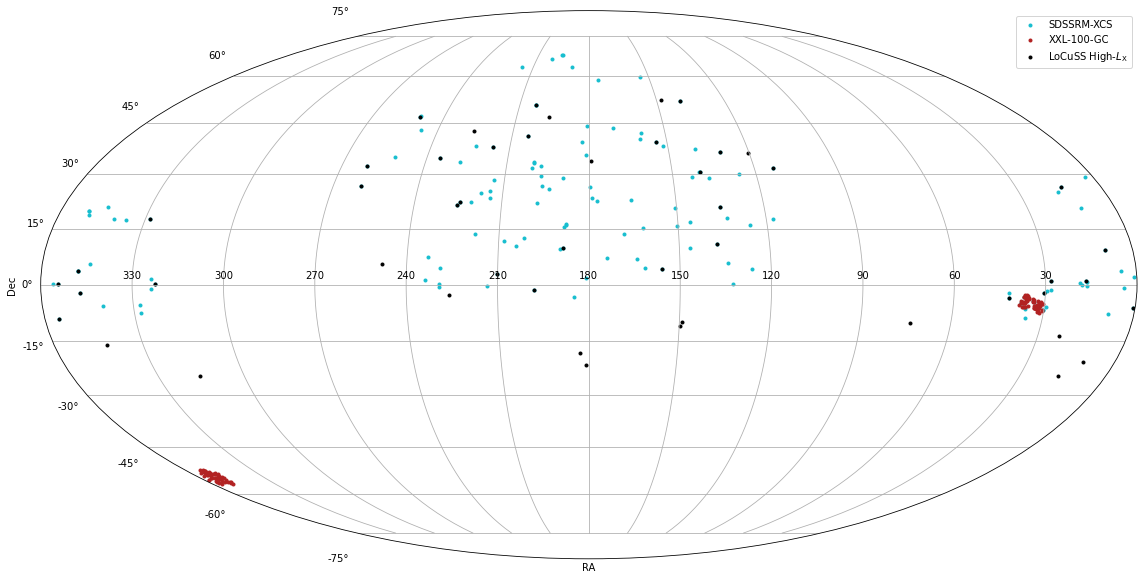

In [18]:
# Extract the RAs and Decs, shift them to the flipped x-axis astronomy convention, convert to radians
sdssxcs_ra = Quantity(xcs3p['xapa_ra'].values-180, 'deg')
sdssxcs_ra = -sdssxcs_ra 
sdssxcs_ra = sdssxcs_ra.to('rad')
sdssxcs_dec = Quantity(xcs3p['xapa_dec'].values, 'deg').to('rad')

xxl_ra = Quantity(xxlgc100['ra'].values-180, 'deg')
xxl_ra = -xxl_ra 
xxl_ra = xxl_ra.to('rad')
xxl_dec = Quantity(xxlgc100['dec'].values, 'deg').to('rad')

locuss_ra = Quantity(locuss['ra'].values-180, 'deg')
locuss_ra = -locuss_ra 
locuss_ra = locuss_ra.to('rad')
locuss_dec = Quantity(locuss['dec'].values, 'deg').to('rad')

# Setting up the figure
fig = plt.figure(figsize=(16, 10))
# Adding a subplot specifically with the Mollweide projection
ax = fig.add_subplot(111, projection='mollweide' )
# Add all of the RA-Dec pairs as dots
ax.scatter(sdssxcs_ra, sdssxcs_dec, marker='.', color=xcs3p_colour, label='SDSSRM-XCS')
ax.scatter(xxl_ra, xxl_dec, marker='.', color=xxlgc100_colour, label='XXL-100-GC')
ax.scatter(locuss_ra, locuss_dec, marker='.', color=locuss_colour, label=r'LoCuSS High-$L_{\rm{X}}$')

# Set up a grid and custom hour labels for the RA axis
ax.grid(True)
ax.set_xticklabels(['330','300','270','240','210','180','150','120','90','60','30'])
# Create x and y axis labels
plt.xlabel('RA')
plt.ylabel(r'Dec')

plt.legend()
plt.tight_layout()
plt.savefig('../outputs/non_paper_figures/SDSSRMXCS+XXL+LoCUSS_radec.png')
plt.show()